### Importing Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
!pip install -U scikit-learn
!pip install -U regex
import sklearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\ggpc\\anaconda3\\lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: regex
    Found existing installation: regex 2021.8.28
    Uninstalling regex-2021.8.28:
      Successfully uninstalled regex-2021.8.28


### Loading the datasets:

In [5]:
alternative = pd.read_csv('genres/alternative.csv')
anime = pd.read_csv('genres/anime.csv')
blues = pd.read_csv('genres/blues.csv')
classical = pd.read_csv('genres/classical.csv')
country = pd.read_csv('genres/country.csv')
electronic = pd.read_csv('genres/electronic.csv')
hip_hop = pd.read_csv('genres/hip-hop.csv')
jazz = pd.read_csv('genres/jazz.csv')
rap = pd.read_csv('genres/rap.csv')
rock = pd.read_csv('genres/rock.csv')
testing_instances = pd.read_csv('testing-instances.csv')

### Combining the training datasets into a single dataframe:

In [3]:
df_list = [alternative, anime, blues, classical, country, electronic, hip_hop, jazz, rap, rock]
all_data = pd.concat(df_list).reset_index(drop=True)


#Take a sample from the dataset, This was useful for saving time during RandomizedCV process.
#all_data = all_data.sample(frac = 0.2).reset_index(drop=True)

display(all_data)

instance_id          artist_name              track_hash  \
0            34428      Type O Negative  0iMN420Q45isZVNlAqzPTW   
1            76036           Atmosphere  0Ft0qrlHO6dvV8qTcpltub   
2            37341          Hawk Nelson  0i1YwWmVoNlAckK2ej9K4I   
3            85209  Nothing But Thieves  0HVyFhnBlnu70TLb7s465K   
4            26964            The Score  0ZjEZWUz3QzI2OB3jU29VB   
...            ...                  ...                     ...   
49995        77890               Weezer  7hI6KmUkRRCpoHINKL1WB9   
49996        84481     A Perfect Circle  4YSSB7ZtqVnbsxybS5NHJC   
49997        61577         James Taylor  7iqWZNpHBAK5jE6e9gPKj9   
49998        50216    The Modern Lovers  4ypa0o9O8nBXkPkjRaT7nU   
49999        80709       Glenn Medeiros  4zGhybGOXwqjji9icrYx9K   

                                   track_name  popularity  acousticness  \
0                           Love You to Death          48       0.35900   
1                                     Puppets          46       0.29900   
2                          Never Let You Down          43       0.29700   
3                               Honey Whiskey          49       0.02360   
4                               Where You Are          43       0.00972   
...                                       ...         ...           ...   
49995                          Happy Together          65       0.17100   
49996                             The Package          53       0.00358   
49997                        Sweet Baby James          60       0.44200   
49998                           Pablo Picasso          55       0.00269   
49999  Nothing's Gonna Change My Love for You          64       0.62700   

       danceability  duration_ms  energy  instrumentalness key  liveness  \
0             0.423       428800   0.738          0.084000  F#    0.0801   
1             0.733       221787   0.444          0.000003   E    0.1040   
2             0.666       262560   0.740          0.000000   G    0.1450   
3             0.561       191947   0.764          0.000014  C#    0.2090   
4             0.652       226333   0.813          0.000041  F#    0.2900   
...             ...          ...     ...               ...  ..       ...   
49995         0.444       145640   0.943          0.000007  F#    0.2970   
49996         0.765       460493   0.397          0.715000   A    0.1170   
49997         0.512       171093   0.239          0.000000   D    0.0930   
49998         0.617       261600   0.729          0.131000   D    0.1090   
49999         0.445       232067   0.378          0.000000  C#    0.0758   

       loudness   mode  speechiness               tempo obtained_date  \
0        -7.329  Major       0.0319             111.414         4-Apr   
1        -7.170  Major       0.1150   89.10600000000001         4-Apr   
2        -5.908  Minor       0.0375             124.911         4-Apr   
3        -5.175  Major       0.0422   90.00399999999999         4-Apr   
4        -4.737  Major       0.0410               124.0         4-Apr   
...         ...    ...          ...                 ...           ...   
49995    -3.724  Minor       0.1040             125.896         4-Apr   
49996   -10.538  Major       0.0359              123.89         4-Apr   
49997   -15.055  Major       0.0353             141.292         3-Apr   
49998    -9.174  Major       0.0306  109.63799999999999         4-Apr   
49999   -15.257  Major       0.0381             142.061         4-Apr   

       valence  music_genre  
0        0.276  Alternative  
1        0.372  Alternative  
2        0.620  Alternative  
3        0.657  Alternative  
4        0.560  Alternative  
...        ...          ...  
49995    0.411         Rock  
49996    0.150         Rock  
49997    0.634         Rock  
49998    0.835         Rock  
49999    0.406         Rock  

[50000 rows x 19 columns]

### Standardizing all representations of missing values as np.nan:

In [4]:
all_data.replace('?', np.nan, inplace = True)
all_data['duration_ms'].replace(-1, np.nan, inplace = True)
all_data['tempo'] = all_data.tempo.astype(float)
testing_instances.replace('?', np.nan, inplace = True)
testing_instances.replace(-1, np.nan, inplace = True)
testing_instances['tempo'] = all_data.tempo.astype(float)

# EDA:

### Checking distribution of genres in dataset:

In [5]:
all_data['music_genre'].value_counts()

Electronic     5000
Rock           5000
Blues          5000
Country        5000
Hip-Hop        5000
Rap            5000
Jazz           5000
Anime          5000
Classical      5000
Alternative    5000
Name: music_genre, dtype: int64

### Correlations between the features:

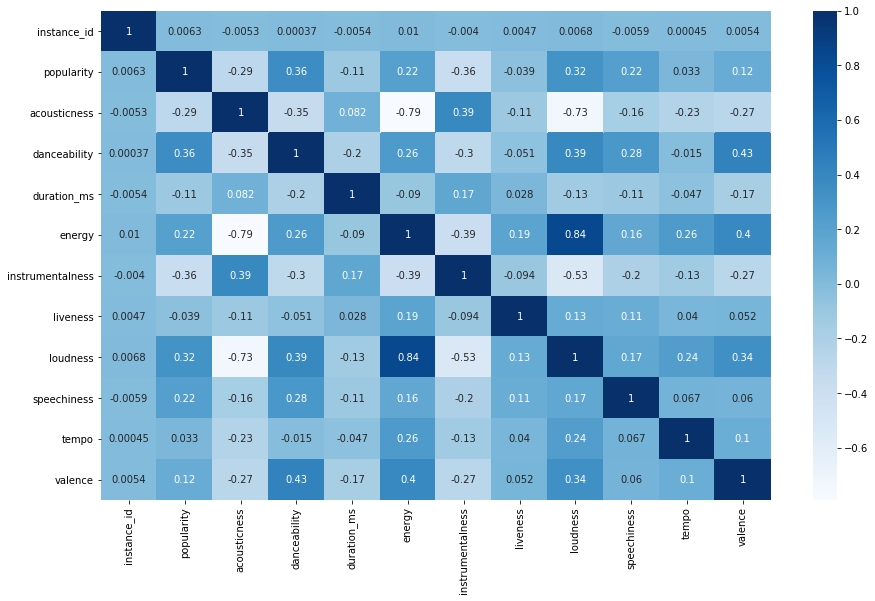

In [6]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(all_data.corr(), cmap='Blues', annot = True)

### Exploring relationships between correlated variables:

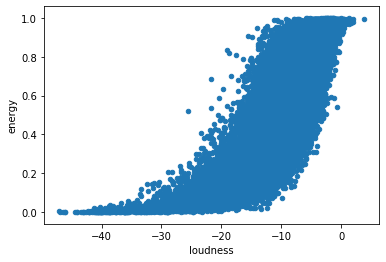

In [7]:
all_data.plot.scatter('loudness','energy')

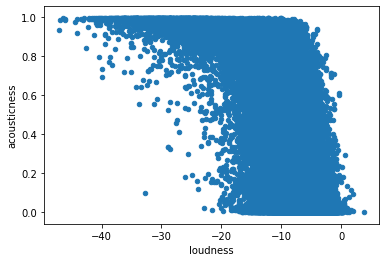

In [8]:
all_data.plot.scatter('loudness','acousticness')

### Exploring distributions for each of the numerical features:

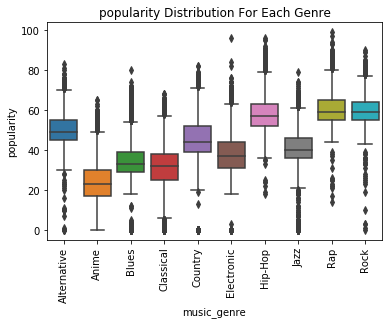

medians for popularity
music_genre
Alternative    49
Anime          23
Blues          33
Classical      32
Country        44
Electronic     37
Hip-Hop        57
Jazz           40
Rap            59
Rock           59
Name: popularity, dtype: int64
Variance: 
156.67777777777778


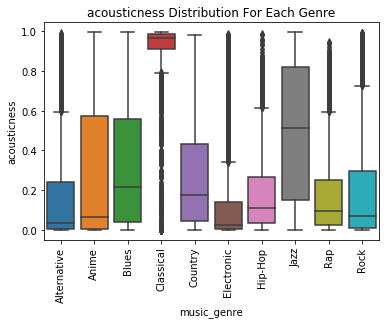

medians for acousticness
music_genre
Alternative    0.03360
Anime          0.06650
Blues          0.21500
Classical      0.96700
Country        0.17500
Electronic     0.02620
Hip-Hop        0.10900
Jazz           0.51500
Rap            0.09385
Rock           0.06995
Name: acousticness, dtype: float64
Variance: 
0.08813266155555556


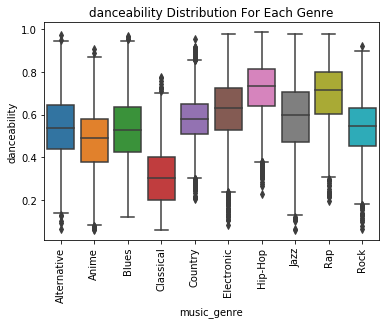

medians for danceability
music_genre
Alternative    0.539
Anime          0.488
Blues          0.529
Classical      0.301
Country        0.581
Electronic     0.629
Hip-Hop        0.733
Jazz           0.600
Rap            0.714
Rock           0.546
Name: danceability, dtype: float64
Variance: 
0.014883333333333335


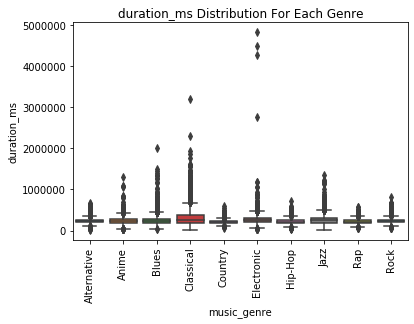

medians for duration_ms
music_genre
Alternative    225691.0
Anime          238820.0
Blues          230227.0
Classical      262000.0
Country        211626.5
Electronic     245217.0
Hip-Hop        215240.0
Jazz           247850.0
Rap            214447.0
Rock           225347.0
Name: duration_ms, dtype: float64
Variance: 
273607672.2472222


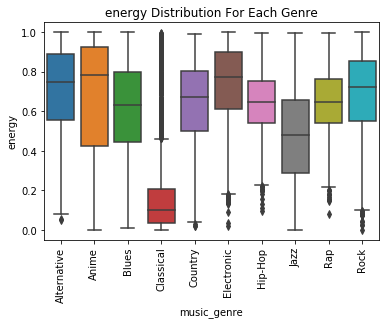

medians for energy
music_genre
Alternative    0.7470
Anime          0.7830
Blues          0.6290
Classical      0.1010
Country        0.6700
Electronic     0.7730
Hip-Hop        0.6475
Jazz           0.4780
Rap            0.6490
Rock           0.7230
Name: energy, dtype: float64
Variance: 
0.04115769166666667


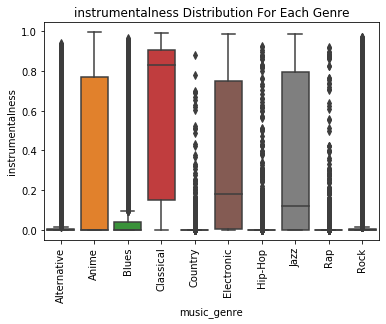

medians for instrumentalness
music_genre
Alternative    0.000068
Anime          0.000400
Blues          0.000957
Classical      0.832000
Country        0.000000
Electronic     0.182000
Hip-Hop        0.000000
Jazz           0.120500
Rap            0.000000
Rock           0.000044
Name: instrumentalness, dtype: float64
Variance: 
0.06786963537779739


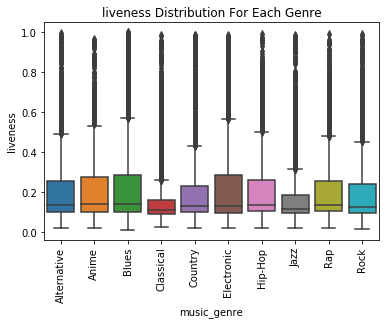

medians for liveness
music_genre
Alternative    0.132
Anime          0.137
Blues          0.139
Classical      0.110
Country        0.128
Electronic     0.129
Hip-Hop        0.136
Jazz           0.115
Rap            0.135
Rock           0.126
Name: liveness, dtype: float64
Variance: 
9.156666666666668e-05


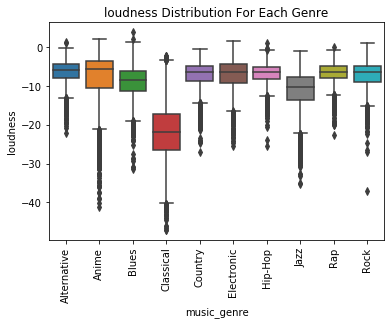

medians for loudness
music_genre
Alternative    -5.9930
Anime          -5.6605
Blues          -8.4555
Classical     -21.8725
Country        -6.5275
Electronic     -6.4650
Hip-Hop        -6.5090
Jazz          -10.3455
Rap            -6.3550
Rock           -6.4400
Name: loudness, dtype: float64
Variance: 
24.15621422500001


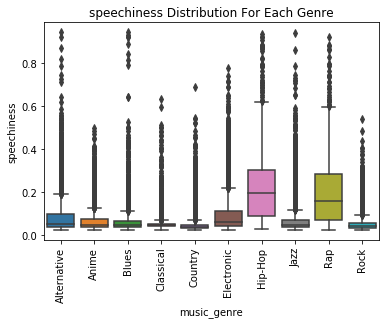

medians for speechiness
music_genre
Alternative    0.0519
Anime          0.0452
Blues          0.0431
Classical      0.0433
Country        0.0346
Electronic     0.0575
Hip-Hop        0.1920
Jazz           0.0438
Rap            0.1585
Rock           0.0391
Name: speechiness, dtype: float64
Variance: 
0.00312644


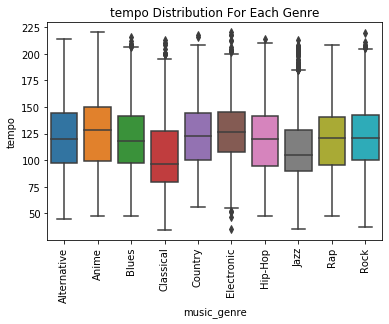

medians for tempo
music_genre
Alternative    120.0530
Anime          127.9720
Blues          118.3720
Classical       96.5515
Country        123.0420
Electronic     125.9830
Hip-Hop        120.2070
Jazz           104.8380
Rap            120.8195
Rock           121.1040
Name: tempo, dtype: float64
Variance: 
94.28485945555556


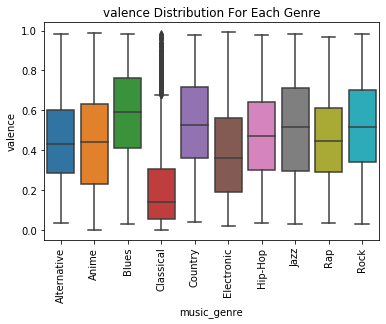

medians for valence
music_genre
Alternative    0.4285
Anime          0.4390
Blues          0.5900
Classical      0.1400
Country        0.5270
Electronic     0.3585
Hip-Hop        0.4735
Jazz           0.5150
Rap            0.4460
Rock           0.5160
Name: valence, dtype: float64
Variance: 
0.01547683611111111


<Figure size 432x288 with 0 Axes>

In [9]:
numerical_columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

for column in numerical_columns:
    fig = sns.boxplot(x=all_data['music_genre'], y = all_data[column])
    medians = all_data.groupby(['music_genre'])[column].median()
   
    plt.title(column + " Distribution For Each Genre")
    plt.xticks(rotation=90)
    plt.show()
    print("medians for " + column)
    print(medians)
    print("Variance: ")
    print(medians.var())
    plt.savefig("boxplots/" + column + " boxplot.png") 
    
    

### Exploring the variance of each of the features:

In [10]:
print(all_data.var())

instance_id         4.295362e+08
popularity          2.415540e+02
acousticness        1.165130e-01
danceability        3.190937e-02
duration_ms         1.241737e+10
energy              6.999161e-02
instrumentalness    1.058911e-01
liveness            2.612654e-02
loudness            3.798244e+01
speechiness         1.027652e-02
tempo               9.389138e+02
valence             6.106767e-02
dtype: float64


### Viusalising distribution of missing values:
#### With help from: https://theprofessionalspoint.blogspot.com/2019/03/visualize-missing-values-in-bar-plot.html

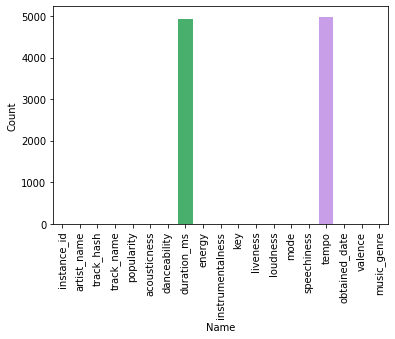

In [11]:
missing_values = all_data.isnull().sum()
missing_values = missing_values.to_frame()
missing_values.columns = ['Count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

sns.barplot(x = 'Name', y = 'Count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()



# Data Preparation:

### Constructing 'is_japanese' and 'track_contains_digit' columns.
#### Help with Japanese regex: https://stackoverflow.com/questions/32863608/regex-python-with-unicode-japanese-character-issue

In [12]:
import regex as re
japanese_pattern = '([\p{Hiragana}\p{Katakana}\p{Han}]+)'

is_japanese = []
for i in range(len(all_data)):
    if re.match(japanese_pattern, all_data['artist_name'][i]) or re.match(japanese_pattern, all_data['track_name'][i]):
        is_japanese.append(1)
    else:
        is_japanese.append(0)
 
all_data.insert(18, 'is_japanese', is_japanese)

track_contains_digit = []
for i in range(len(all_data)):
    if any(char.isdigit() for char in all_data['track_name'][i]):
           track_contains_digit.append(1)
    else:
           track_contains_digit.append(0)
    
all_data.insert(18, 'track_contains_digit', track_contains_digit)

display(all_data)

Name   instance_id          artist_name              track_hash  \
0            34428      Type O Negative  0iMN420Q45isZVNlAqzPTW   
1            76036           Atmosphere  0Ft0qrlHO6dvV8qTcpltub   
2            37341          Hawk Nelson  0i1YwWmVoNlAckK2ej9K4I   
3            85209  Nothing But Thieves  0HVyFhnBlnu70TLb7s465K   
4            26964            The Score  0ZjEZWUz3QzI2OB3jU29VB   
...            ...                  ...                     ...   
49995        77890               Weezer  7hI6KmUkRRCpoHINKL1WB9   
49996        84481     A Perfect Circle  4YSSB7ZtqVnbsxybS5NHJC   
49997        61577         James Taylor  7iqWZNpHBAK5jE6e9gPKj9   
49998        50216    The Modern Lovers  4ypa0o9O8nBXkPkjRaT7nU   
49999        80709       Glenn Medeiros  4zGhybGOXwqjji9icrYx9K   

Name                               track_name  popularity  acousticness  \
0                           Love You to Death          48       0.35900   
1                                     Puppets          46       0.29900   
2                          Never Let You Down          43       0.29700   
3                               Honey Whiskey          49       0.02360   
4                               Where You Are          43       0.00972   
...                                       ...         ...           ...   
49995                          Happy Together          65       0.17100   
49996                             The Package          53       0.00358   
49997                        Sweet Baby James          60       0.44200   
49998                           Pablo Picasso          55       0.00269   
49999  Nothing's Gonna Change My Love for You          64       0.62700   

Name   danceability  duration_ms  energy  instrumentalness  ... liveness  \
0             0.423     428800.0   0.738          0.084000  ...   0.0801   
1             0.733     221787.0   0.444          0.000003  ...   0.1040   
2             0.666     262560.0   0.740          0.000000  ...   0.1450   
3             0.561     191947.0   0.764          0.000014  ...   0.2090   
4             0.652     226333.0   0.813          0.000041  ...   0.2900   
...             ...          ...     ...               ...  ...      ...   
49995         0.444     145640.0   0.943          0.000007  ...   0.2970   
49996         0.765     460493.0   0.397          0.715000  ...   0.1170   
49997         0.512     171093.0   0.239          0.000000  ...   0.0930   
49998         0.617     261600.0   0.729          0.131000  ...   0.1090   
49999         0.445     232067.0   0.378          0.000000  ...   0.0758   

Name   loudness   mode speechiness    tempo  obtained_date valence  \
0        -7.329  Major      0.0319  111.414          4-Apr   0.276   
1        -7.170  Major      0.1150   89.106          4-Apr   0.372   
2        -5.908  Minor      0.0375  124.911          4-Apr   0.620   
3        -5.175  Major      0.0422   90.004          4-Apr   0.657   
4        -4.737  Major      0.0410  124.000          4-Apr   0.560   
...         ...    ...         ...      ...            ...     ...   
49995    -3.724  Minor      0.1040  125.896          4-Apr   0.411   
49996   -10.538  Major      0.0359  123.890          4-Apr   0.150   
49997   -15.055  Major      0.0353  141.292          3-Apr   0.634   
49998    -9.174  Major      0.0306  109.638          4-Apr   0.835   
49999   -15.257  Major      0.0381  142.061          4-Apr   0.406   

Name   track_contains_digit  is_japanese  music_genre  
0                         0            0  Alternative  
1                         0            0  Alternative  
2                         0            0  Alternative  
3                         0            0  Alternative  
4                         0            0  Alternative  
...                     ...          ...          ...  
49995                     0            0         Rock  
49996                     0            0         Rock  
49997                     0         

### Visualising the frequencies of Japanese characters in artist names and digits in track names:

{'Alternative': 1, 'Anime': 1103, 'Blues': 0, 'Classical': 32, 'Country': 0, 'Electronic': 1, 'Hip-Hop': 0, 'Jazz': 7, 'Rap': 0, 'Rock': 0}
{'Alternative': 207, 'Anime': 260, 'Blues': 360, 'Classical': 3272, 'Country': 132, 'Electronic': 312, 'Hip-Hop': 303, 'Jazz': 248, 'Rap': 278, 'Rock': 404}


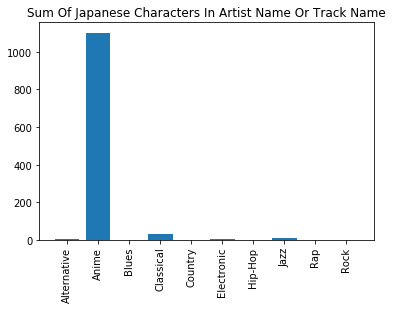

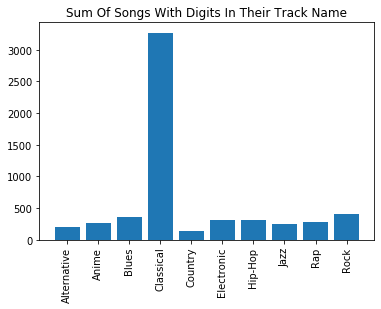

In [13]:
sum_is_japanese = {}
sum_has_digits = {}

all_genres = all_data['music_genre'].unique()

for genre in all_genres:
    current_genre = all_data.loc[all_data['music_genre']== genre]
    
    sum_japanese = current_genre['is_japanese'].sum()
    sum_is_japanese[genre] = sum_japanese
    
    sum_digits = current_genre['track_contains_digit'].sum()
    sum_has_digits[genre] = sum_digits
 
print(sum_is_japanese)
print(sum_has_digits)
plt.bar(sum_is_japanese.keys(), sum_is_japanese.values())
plt.xticks(rotation=90)
plt.title("Sum Of Japanese Characters In Artist Name Or Track Name")
plt.show()

plt.bar(sum_has_digits.keys(), sum_has_digits.values())
plt.xticks(rotation=90)
plt.title("Sum Of Songs With Digits In Their Track Name")
plt.show()


### Inserting domain knowledge columns for testing_instances:

In [14]:
is_japanese = []
for i in range(len(testing_instances)):
    if re.match(japanese_pattern, testing_instances['artist_name'][i]) or re.match(japanese_pattern, testing_instances['track_name'][i]):
        is_japanese.append(1)
    else:
        is_japanese.append(0)
 
testing_instances.insert(18, 'is_japanese', is_japanese)


track_contains_digit = []
for i in range(len(testing_instances)):
    if any(char.isdigit() for char in testing_instances['track_name'][i]):
           track_contains_digit.append(1)
    else:
           track_contains_digit.append(0)
    
testing_instances.insert(18, 'track_contains_digit', track_contains_digit)

display(testing_instances)

instance_id           artist_name              track_hash  \
0                1          Shiro Sagisu  15Xdlu0QaiEy3YFTf4xpUA   
1                2  Global Communication  1hMrCqVEC514MrZYzQoQAM   
2                3         Gustav Mahler  3xlN0Fe1oEOEiE3yWLYcSD   
3                4           DragonForce  3vXRZhHnVB3Z5scbRgH1ah   
4                5            Malibu Ken  0G8B6BhNQdcDSQFWSJh3X3   
...            ...                   ...                     ...   
19995        19996            Young Thug  3ND82YO0h3Q35zQks4OhY1   
19996        19997        The Avalanches  1edmumYyXhNVy6R6AEUs3i   
19997        19998        The Mars Volta  0Ffe79JCwIQxGBb0W55Kv9   
19998        19999     Capcom Sound Team  1cbLHauRcihmaRU3ISr6ru   
19999        20000           The Carters  3rdYtlGuJD7l6DRA4mrXjw   

                                              track_name  popularity  \
0                                     Premiere Manoeuvre          20   
1                                                   8:07          29   
2      Symphony No. 8 in E-Flat Major - "Symphony of ...           5   
3                                            Cry Thunder          46   
4                                              Corn Maze          44   
...                                                  ...         ...   
19995                                              Check          66   
19996                               Live A Lifetime Love          34   
19997                                     Inertiatic Esp          48   
19998                                  成歩堂龍一 〜異議あり! 2001          16   
19999                                       BLACK EFFECT          53   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
0          0.713000         0.298     173973.0   0.370          0.937000  A#   
1          0.408000         0.662     490653.0   0.528          0.868000   E   
2          0.947000         0.307     216973.0   0.111          0.625000  D#   
3          0.000345         0.268     316147.0   0.966          0.000007   B   
4          0.363000         0.709     202667.0   0.624          0.000031  A#   
...             ...           ...          ...     ...               ...  ..   
19995      0.042800         0.667     230693.0   0.581          0.000000   C   
19996      0.176000         0.516     150787.0   0.830          0.000132  A#   
19997      0.003640         0.227          NaN   0.853          0.000106  F#   
19998      0.120000         0.616      82600.0   0.578          0.435000   G   
19999      0.181000         0.459     315040.0   0.686          0.000000   C   

       liveness  loudness   mode  speechiness    tempo obtained_date  valence  \
0         0.161   -10.885  Major       0.0346  111.414         3-Apr   0.1270   
1         0.110   -15.635  Minor       0.0615   89.106         4-Apr   0.5090   
2         0.804   -20.268  Major       0.0346  124.911         4-Apr   0.0702   
3         0.291    -3.146  Minor       0.0719   90.004         4-Apr   0.5670   
4         0.109    -6.065  Minor       0.2890  124.000         4-Apr   0.8640   
...         ...       ...    ...          ...      ...           ...      ...   
19995     0.183    -5.164  Minor       0.3230   92.090         4-Apr   0.3680   
19996     0.883    -8.539  Minor       0.1960   82.437         4-Apr   0.3120   
19997     0.665    -3.424  Minor       0.0949      NaN         3-Apr   0.4190   
19998     0.228    -8.438  Minor       0.0378   71.705         4-Apr   0.9520   
19999     0.481    -6.592  Minor       0.4530  124.737         4-Apr   0.5450   

       track_contains_digit  is_japanese  
0                         0            0  
1                         1            0  
2                         1            0  
3                         0            0  
4                         0            0  
...                     ...          ...  
19995                     0            0  
19996                     0            0  
1999

### Removing features that aren't useful for machine learning:

In [15]:
all_data.drop(['instance_id', 'artist_name', 'track_hash', 'track_name', 'obtained_date'], axis = 1, inplace = True)

testing_instances_ids = testing_instances['instance_id'].copy()

testing_instances.drop(['instance_id', 'artist_name', 'track_hash', 'track_name', 'obtained_date'], axis = 1, inplace = True)

### Option 1:  Running a train-test split on all the training data:

In [16]:
X = all_data.drop(['music_genre'], axis = 1)
y = all_data['music_genre']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop = True)

### Option 2:   Running without a train test split:

In [17]:
"""
#No split:

X_train = all_data.drop(['music_genre'], axis = 1)
y_train = all_data['music_genre']
"""

"\n#No split:\n\nX_train = all_data.drop(['music_genre'], axis = 1)\ny_train = all_data['music_genre']\n"

### Encoding the 'key' and 'mode' columns:

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder_key = LabelEncoder()
encoder_mode = LabelEncoder()


X_train['key'] = encoder_key.fit_transform(X_train['key'].values.reshape(-1, 1))

X_train['mode'] = encoder_mode.fit_transform(X_train['mode'].values.reshape(-1, 1))

display(X_train)

column_names = X_train.columns


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Name   popularity  acousticness  danceability  duration_ms  energy  \
0              53      0.000043         0.566     233667.0   0.889   
1              57      0.537000         0.709     259040.0   0.685   
2              56      0.187000         0.468     212924.0   0.874   
3              44      0.381000         0.707     158501.0   0.657   
4              50      0.311000         0.353     286231.0   0.593   
...           ...           ...           ...          ...     ...   
34995          50      0.082200         0.628          NaN   0.584   
34996          73      0.006710         0.568     197759.0   0.636   
34997          48      0.000037         0.235     185360.0   0.980   
34998          34      0.853000         0.809     118573.0   0.546   
34999          62      0.052400         0.881     187454.0   0.633   

Name   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0              0.009070   11    0.2920    -5.220     0       0.0426  127.045   
1              0.000000    0    0.2330    -5.913     1       0.0341  134.760   
2              0.000000   10    0.0718    -4.450     1       0.0992   79.988   
3              0.000000   10    0.1040    -8.982     0       0.0371  129.928   
4              0.000000    0    0.0685    -9.675     0       0.0457   82.560   
...                 ...  ...       ...       ...   ...          ...      ...   
34995          0.433000   10    0.2980    -8.030     0       0.0284  112.000   
34996          0.000000    2    0.1050    -4.265     0       0.2040      NaN   
34997          0.006060    7    0.3990    -5.732     1       0.0958  163.596   
34998          0.740000    2    0.1030   -13.949     1       0.0605  110.018   
34999          0.000007    4    0.1580    -6.647     1       0.0683  121.922   

Name   valence  track_contains_digit  is_japanese  
0        0.141                     0            0  
1        0.660                     0            0  
2        0.523                     0            0  
3        0.856                     0            0  
4        0.488                     1            0  
...        ...                   ...          ...  
34995    0.335                     0            0  
34996    0.879                     0            0  
34997    0.602                     0            0  
34998    0.223                     0            0  
34999    0.335                     0            0  

[35000 rows x 15 columns]

### Imputing missing values:

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

X_train = imputer.fit_transform(X_train)

#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_train = pd.DataFrame(X_train, columns = column_names)

print(X_train.isnull().sum())
display(X_train)


Name
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
mode                    0
speechiness             0
tempo                   0
valence                 0
track_contains_digit    0
is_japanese             0
dtype: int64


Name   popularity  acousticness  danceability  duration_ms  energy  \
0            53.0      0.000043         0.566     233667.0   0.889   
1            57.0      0.537000         0.709     259040.0   0.685   
2            56.0      0.187000         0.468     212924.0   0.874   
3            44.0      0.381000         0.707     158501.0   0.657   
4            50.0      0.311000         0.353     286231.0   0.593   
...           ...           ...           ...          ...     ...   
34995        50.0      0.082200         0.628     254794.6   0.584   
34996        73.0      0.006710         0.568     197759.0   0.636   
34997        48.0      0.000037         0.235     185360.0   0.980   
34998        34.0      0.853000         0.809     118573.0   0.546   
34999        62.0      0.052400         0.881     187454.0   0.633   

Name   instrumentalness   key  liveness  loudness  mode  speechiness  \
0              0.009070  11.0    0.2920    -5.220   0.0       0.0426   
1              0.000000   0.0    0.2330    -5.913   1.0       0.0341   
2              0.000000  10.0    0.0718    -4.450   1.0       0.0992   
3              0.000000  10.0    0.1040    -8.982   0.0       0.0371   
4              0.000000   0.0    0.0685    -9.675   0.0       0.0457   
...                 ...   ...       ...       ...   ...          ...   
34995          0.433000  10.0    0.2980    -8.030   0.0       0.0284   
34996          0.000000   2.0    0.1050    -4.265   0.0       0.2040   
34997          0.006060   7.0    0.3990    -5.732   1.0       0.0958   
34998          0.740000   2.0    0.1030   -13.949   1.0       0.0605   
34999          0.000007   4.0    0.1580    -6.647   1.0       0.0683   

Name      tempo  valence  track_contains_digit  is_japanese  
0      127.0450    0.141                   0.0          0.0  
1      134.7600    0.660                   0.0          0.0  
2       79.9880    0.523                   0.0          0.0  
3      129.9280    0.856                   0.0          0.0  
4       82.5600    0.488                   1.0          0.0  
...         ...      ...                   ...          ...  
34995  112.0000    0.335                   0.0          0.0  
34996  115.8724    0.879                   0.0          0.0  
34997  163.5960    0.602                   0.0          0.0  
34998  110.0180    0.223                   0.0          0.0  
34999  121.9220    0.335                   0.0          0.0  

[35000 rows x 15 columns]

### Scaling the data:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = column_names)

display(X_train)

Name   popularity  acousticness  danceability  duration_ms    energy  \
0        0.564371     -0.897725      0.046255    -0.110221  1.091925   
1        0.821074      0.674327      0.848079     0.131540  0.320641   
2        0.756898     -0.350370     -0.503246    -0.307866  1.035213   
3       -0.013211      0.217605      0.836865    -0.826424  0.214779   
4        0.371844      0.012666     -1.148069     0.390624 -0.027193   
...           ...           ...           ...          ...       ...   
34995    0.371844     -0.657193      0.393899     0.091089 -0.061220   
34996    1.847886     -0.878205      0.057470    -0.452363  0.135382   
34997    0.243492     -0.897742     -1.809714    -0.570504  1.435978   
34998   -0.654969      1.599482      1.408795    -1.206870 -0.204890   
34999    1.141953     -0.744439      1.812510    -0.550552  0.124040   

Name   instrumentalness       key  liveness  loudness      mode  speechiness  \
0             -0.531099  1.624957  0.604162  0.634543 -0.749535    -0.501281   
1             -0.558988 -1.546245  0.240191  0.521798  1.334160    -0.585294   
2             -0.558988  1.336666 -0.754251  0.759815  1.334160     0.058146   
3             -0.558988  1.336666 -0.555609  0.022500 -0.749535    -0.555642   
4             -0.558988 -1.546245 -0.774609 -0.090244 -0.749535    -0.470641   
...                 ...       ...       ...       ...       ...          ...   
34995          0.772424  1.336666  0.641176  0.177382 -0.749535    -0.641632   
34996         -0.558988 -0.969663 -0.549440  0.789913 -0.749535     1.093976   
34997         -0.540354  0.471792  1.264244  0.551245  1.334160     0.024541   
34998          1.716404 -0.969663 -0.561778 -0.785585  1.334160    -0.324360   
34999         -0.558967 -0.393081 -0.222484  0.402383  1.334160    -0.247265   

Name      tempo   valence  track_contains_digit  is_japanese  
0      0.234609 -1.275796             -0.360730    -0.151963  
1      0.496729  0.826217             -0.360730    -0.151963  
2     -1.364170  0.271351             -0.360730    -0.151963  
3      0.332560  1.620041             -0.360730    -0.151963  
4     -1.276786  0.129596              2.772159    -0.151963  
...         ...       ...                   ...          ...  
34995 -0.276551 -0.490072             -0.360730    -0.151963  
34996 -0.144985  1.713194             -0.360730    -0.151963  
34997  1.476442  0.591310             -0.360730    -0.151963  
34998 -0.343890 -0.943686             -0.360730    -0.151963  
34999  0.060553 -0.490072             -0.360730    -0.151963  

[35000 rows x 15 columns]

### Some feature construction testing using ICA. This didn't contribute to my final score since it resulted in lower performance:

In [21]:
"""

from sklearn.decomposition import FastICA

pca = FastICA(n_components = 2)
pca.fit(X_train[['energy', 'loudness', 'acousticness']])

pca_train = pd.DataFrame(pca.transform(X_train[['energy', 'loudness', 'acousticness']]))

X_train.drop(['energy', 'loudness', 'acousticness'], axis = 1, inplace = True)
X_train[["Feature1", "Feature2"]] = pca_train


"""

'\n\nfrom sklearn.decomposition import FastICA\n\npca = FastICA(n_components = 2)\npca.fit(X_train[[\'energy\', \'loudness\', \'acousticness\']])\n\npca_train = pd.DataFrame(pca.transform(X_train[[\'energy\', \'loudness\', \'acousticness\']]))\n\nX_train.drop([\'energy\', \'loudness\', \'acousticness\'], axis = 1, inplace = True)\nX_train[["Feature1", "Feature2"]] = pca_train\n\n\n'

### Applying transformations to the test data from our train-test split:

In [22]:
#Encoding the keys:

X_test['key'] = encoder_key.transform(X_test['key'].values.reshape(-1, 1))
X_test['mode'] = encoder_mode.transform(X_test['mode'].values.reshape(-1, 1))

#Impute the missing values:

X_test = imputer.transform(X_test)
X_test = pd.DataFrame(X_test, columns= column_names)

#Scale the data:

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = column_names)


#Feature reduction testing: 


"""pca_test = pd.DataFrame(pca.transform(X_test[['energy', 'loudness', 'acousticness']]))
X_test.drop(['energy', 'loudness', 'acousticness'], axis = 1, inplace = True)
X_test[["Feature1", "Feature2"]] = pca_test"""









C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


'pca_test = pd.DataFrame(pca.transform(X_test[[\'energy\', \'loudness\', \'acousticness\']]))\nX_test.drop([\'energy\', \'loudness\', \'acousticness\'], axis = 1, inplace = True)\nX_test[["Feature1", "Feature2"]] = pca_test'

### Applying transformations to the testing instances dataset:

In [23]:
X_prediction=testing_instances.copy()

#Encoding:

X_prediction['key'] = encoder_key.transform(X_prediction['key'].values.reshape(-1, 1))

X_prediction['mode'] = encoder_mode.transform(X_prediction['mode'].values.reshape(-1, 1))


#Impute the missing values:
X_prediction = imputer.transform(X_prediction)
X_prediction = pd.DataFrame(X_prediction, columns= column_names)

#Scale the data:
X_prediction = scaler.transform(X_prediction)
X_prediction = pd.DataFrame(X_prediction, columns = column_names)

#Feature reduction testing:


"""pca_test = pd.DataFrame(pca.transform(X_prediction[['energy', 'loudness', 'acousticness']]))
X_prediction.drop(['energy', 'loudness', 'acousticness'], axis = 1, inplace = True)
X_prediction[["Feature1", "Feature2"]] = pca_test"""






C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


'pca_test = pd.DataFrame(pca.transform(X_prediction[[\'energy\', \'loudness\', \'acousticness\']]))\nX_prediction.drop([\'energy\', \'loudness\', \'acousticness\'], axis = 1, inplace = True)\nX_prediction[["Feature1", "Feature2"]] = pca_test'

### Fitting data to classification algorithms using default parameters:

In [24]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.4902666666666667


In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.5598666666666666


In [26]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.5898666666666667


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.5889333333333333


In [28]:
from sklearn.svm import SVC
clf = SVC()

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.5834


In [29]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.3655333333333333


### Outputting MLP Classifier with Default Parameters to CSV:

In [30]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()

clf.fit(X_train, y_train)
print("Score = ", clf.score(X_test, y_test))

predicted_genres = clf.predict(X_prediction)

testing_instances_ids_df = testing_instances_ids.to_frame()

predicted_genres_df = pd.DataFrame(predicted_genres, columns = ['music_genre'])

output_data = [testing_instances_ids_df, predicted_genres_df]
output_df = pd.concat(output_data, axis=1)
output_df.to_csv("output.csv")

Score =  0.5925333333333334


C:\Users\GGPC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Additional Tests (Not used in final submission):

### Parameter Hypertuning for RandomForestClassifier:

In [32]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state = 1)

parameters = {n_estimators = [100, 300, 500, 800, 1200],
              max_depth = [5, 8, 10, 15, 25, 30],
              min_samples_split = [2,5,10,15, 100],
              min_samples_leaf = [1,2,5,10])
              }

gridF = RandomizedSearchCV(forest, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.score(X_test, y_test))
print(bestF.best_params_)"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\n\nclf = RandomForestClassifier(random_state = 1)\n\nparameters = {n_estimators = [100, 300, 500, 800, 1200],\n              max_depth = [5, 8, 10, 15, 25, 30],\n              min_samples_split = [2,5,10,15, 100],\n              min_samples_leaf = [1,2,5,10])\n              }\n\ngridF = RandomizedSearchCV(forest, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)\nbestF = gridF.fit(X_train, y_train)\n\nprint(bestF.score(X_test, y_test))\nprint(bestF.best_params_)'

### Outputting RandomForestClassifier predictions to CSV:

In [33]:
"""
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 0, 
                             n_estimators = 300, 
                             min_samples_split = 5, 
                             min_samples_leaf = 1, 
                             max_depth = 10)

clf.fit(X_train, y_train)
print("Score = ", clf.score(X_test, y_test))

predicted_genres = clf.predict(X_prediction)

testing_instances_ids_df = testing_instances_ids.to_frame()

predicted_genres_df = pd.DataFrame(predicted_genres, columns = ['music_genre'])

output_data = [testing_instances_ids_df, predicted_genres_df]
output_df = pd.concat(output_data, axis=1)
output_df.to_csv("output.csv")"""

'\nfrom sklearn.ensemble import RandomForestClassifier\nclf = RandomForestClassifier(random_state = 0, \n                             n_estimators = 300, \n                             min_samples_split = 5, \n                             min_samples_leaf = 1, \n                             max_depth = 10)\n\nclf.fit(X_train, y_train)\nprint("Score = ", clf.score(X_test, y_test))\n\npredicted_genres = clf.predict(X_prediction)\n\ntesting_instances_ids_df = testing_instances_ids.to_frame()\n\npredicted_genres_df = pd.DataFrame(predicted_genres, columns = [\'music_genre\'])\n\noutput_data = [testing_instances_ids_df, predicted_genres_df]\noutput_df = pd.concat(output_data, axis=1)\noutput_df.to_csv("output.csv")'

### Hyper parameter tuning for MLP: 
#### With help from: https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

In [34]:
"""from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)
print("Score after:", clf.score(X_test, y_test))

print('Best parameters found:\n', clf.best_params_)
"""

'from sklearn.neural_network import MLPClassifier\nmlp = MLPClassifier()\n\nparameter_space = {\n    \'hidden_layer_sizes\': [(50,50,50), (50,100,50), (100,)],\n    \'activation\': [\'tanh\', \'relu\'],\n    \'solver\': [\'sgd\', \'adam\'],\n    \'alpha\': [0.0001, 0.05],\n    \'learning_rate\': [\'constant\',\'adaptive\'],\n}\n\nfrom sklearn.model_selection import GridSearchCV\n\nclf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)\nclf.fit(X_train, y_train)\nprint("Score after:", clf.score(X_test, y_test))\n\nprint(\'Best parameters found:\n\', clf.best_params_)\n'

### Hyper parameter tuning for GradientBoostingClassifier: 

In [35]:
"""from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = GradientBoostingClassifier(random_state = 0)

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

gridF = RandomizedSearchCV(clf, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print(bestF.score(X_test, y_test))
print(bestF.best_params_)"""

'from sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\n\nclf = GradientBoostingClassifier(random_state = 0)\n\nparameters = {\n    "n_estimators":[5,50,250,500],\n    "max_depth":[1,3,5,7,9],\n    "learning_rate":[0.01,0.1,1,10,100]\n}\n\ngridF = RandomizedSearchCV(clf, parameters, n_iter = 100, cv = 3, verbose = 10, random_state = 1, n_jobs = -1)\nbestF = gridF.fit(X_train, y_train)\n\nprint(bestF.score(X_test, y_test))\nprint(bestF.best_params_)'

### Outputting RandomForestClassifier predictions to CSV:

In [36]:
"""from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state = 0,
                                n_estimators = 500,
                                max_depth = 1,
                                learning_rate = 0.1)


clf.fit(X_train, y_train)
print("Score = ", clf.score(X_test, y_test))

predicted_genres = clf.predict(X_prediction)

testing_instances_ids_df = testing_instances_ids.to_frame()

predicted_genres_df = pd.DataFrame(predicted_genres, columns = ['music_genre'])

output_data = [testing_instances_ids_df, predicted_genres_df]
output_df = pd.concat(output_data, axis=1)
output_df.to_csv("output.csv")"""

'from sklearn.ensemble import GradientBoostingClassifier\n\nclf = GradientBoostingClassifier(random_state = 0,\n                                n_estimators = 500,\n                                max_depth = 1,\n                                learning_rate = 0.1)\n\n\nclf.fit(X_train, y_train)\nprint("Score = ", clf.score(X_test, y_test))\n\npredicted_genres = clf.predict(X_prediction)\n\ntesting_instances_ids_df = testing_instances_ids.to_frame()\n\npredicted_genres_df = pd.DataFrame(predicted_genres, columns = [\'music_genre\'])\n\noutput_data = [testing_instances_ids_df, predicted_genres_df]\noutput_df = pd.concat(output_data, axis=1)\noutput_df.to_csv("output.csv")'